In [20]:
import pandas as pd
import numpy as np

from sklearn import neighbors

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

get_ipython().magic('matplotlib inline')
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style('white')
sns.set_context('notebook')

In [2]:
data=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Sherpa\\sherpa_proj_couriers.csv')

data.head(10)

,Couriers ID,Vehicles Name,Couriers Tier,Couriers City Name,Couriers Metro Area,Couriers Time Zone,Couriers Alcohol (Yes / No),Couriers Has High Vis Vest (Yes / No),Couriers Has Mask (Yes / No),Couriers Has Read Manual (Yes / No),Couriers Has Safety Boots (Yes / No),Couriers Has Trolley (Yes / No),Couriers Heavy (Yes / No)
0,97411,Car,Basecamp,South Windsor,Sydney,Australia/Sydney,Yes,Yes,Yes,Yes,Yes,No,Yes
1,97371,Car,Basecamp,Sutherland,Sydney,Australia/Sydney,Yes,No,Yes,Yes,No,No,No
2,97288,Car,Basecamp,Wyee Point,Sydney,Australia/Sydney,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,97282,Car,Basecamp,Kellyville,Sydney,Australia/Sydney,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,97271,Wagon/Ute,Basecamp,Figtree,Wollongong,Australia/Sydney,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,97254,Car,Basecamp,Pendle Hill,Sydney,Australia/Sydney,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,97198,Car,Basecamp,Cannington,Perth,Australia/Perth,Yes,Yes,Yes,Yes,Yes,No,Yes
7,97188,Car,Basecamp,Norwood,Adelaide,Australia/Adelaide,Yes,No,No,Yes,No,No,Yes
8,97166,Car,Basecamp,Crestwood,Canberra,Australia/Canberra,Yes,Yes,Yes,Yes,Yes,Yes,Yes
9,97133,Car,Basecamp,Corio,Geelong,Australia/Melbourne,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [3]:
data.describe().round(3)

,Couriers ID
count,5229.000
mean,67138.917
std,20753.758
min,66.000
25%,53363.000
50%,70472.000
75%,84276.000
max,97411.000


In [4]:
categorical_features = data.select_dtypes(include=[np.object])

categorical_features.columns

<ipython-input-4-474ab472a831>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(include=[np.object])


Index(['Vehicles Name', 'Couriers Tier', 'Couriers City Name',
       'Couriers Metro Area', 'Couriers Time Zone',
       'Couriers Alcohol (Yes / No)', 'Couriers Has High Vis Vest (Yes / No)',
       'Couriers Has Mask (Yes / No)', 'Couriers Has Read Manual (Yes / No)',
       'Couriers Has Safety Boots (Yes / No)',
       'Couriers Has Trolley (Yes / No)', 'Couriers Heavy (Yes / No)'],
      dtype='object')

From dataset above, we can explore the conditon of the Couriers Alcohol,Heavy in different area and vehicle.

In [5]:
from collections import Counter

In [6]:
Counter(list(data["Couriers Alcohol (Yes / No)"]))

Counter({'Yes': 4933, 'No': 296})

In [7]:
Counter(list(data["Couriers Heavy (Yes / No)"]))

Counter({'Yes': 4775, 'No': 454})

In [8]:
Counter(list(data["Couriers Metro Area"]))

Counter({'Sydney': 1301,
         'Wollongong': 51,
         'Perth': 388,
         'Adelaide': 363,
         'Canberra': 220,
         'Geelong': 106,
         'Brisbane': 648,
         'Melbourne': 1557,
         'Gold Coast': 186,
         'Hobart': 124,
         'Launceston': 53,
         'Gosford': 38,
         'Sunshine Coast': 77,
         'Albury': 35,
         'Newcastle': 53,
         'Ballina': 10,
         'Cairns': 13,
         'Mackay': 1,
         'Auckland': 1,
         nan: 3,
         'Gladstone': 1})

Melbourne is the place that has most couriers

In [9]:
Counter(list(data["Vehicles Name"]))

Counter({'Car': 4754, 'Wagon/Ute': 287, 'Van ': 144, 'Motorbike': 44})

# 

In [11]:
data2=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Sherpa\\sherpa_proj_data_dictionary.csv')
data2.head(10)

,Header,Definition
0,Deliveries ID,NaN
1,Deliveries User ID,NaN
2,Deliveries Courier ID,NaN
3,Deliveries Run ID,Run are multiple deliveries that have been gro...
4,Deliveries Type,NaN
5,Deliveries State Name,NaN
6,Deliveries Delivery Option Name,Delivery option is based on the length of time...
7,Deliveries Delivery Price,Price paid to driver
8,Deliveries Amount,Price charged to User
9,Deliveries Refund Amount,Amount refunded to User


In [12]:
data2.count()

Header        43
Definition    25
dtype: int64

# 

In [13]:
data3=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Sherpa\\sherpa_proj_deliveries.csv')
data3.head(5)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Deliveries ID,Deliveries User ID,Deliveries Courier ID,Deliveries Run ID,Deliveries Type,Deliveries State Name,Deliveries Delivery Option Name,Deliveries Delivery Price,Deliveries Amount,Deliveries Refund Amount,...,Delivery Surcharges Multiple Items User,Deliveries Alcohol (Yes / No),Deliveries Check ID (Yes / No),Deliveries Fragile (Yes / No),Deliveries Important (Yes / No),Deliveries Insurance Level,Deliveries Item Number,Deliveries Leave Unattended (Yes / No),Deliveries Police Check (Yes / No),Deliveries Open At Time
0,2329758,56614,NaN,NaN,SimpleDelivery,cancelled,4 hour,30.38,40.50,40.5,...,0.00,No,No,Yes,No,0,1,No,No,2021-06-23 22:45:00
1,2613555,2872,21194.0,NaN,SimpleDelivery,closed,4 hour,12.76,17.01,0.0,...,3.01,No,No,Yes,No,0,4,Yes,No,2021-05-07 23:15:00
2,2736202,1124,43867.0,316519.0,SimpleDelivery,closed,2 hour,24.59,34.50,0.0,...,0.00,No,No,Yes,No,0,1,No,No,2021-01-07 23:45:00
3,2790701,47377,45814.0,NaN,SimpleDelivery,closed,Same day,21.75,29.00,0.0,...,0.00,No,No,Yes,No,0,1,No,No,2021-02-05 00:00:00
4,2790718,47377,67965.0,339304.0,SimpleDelivery,closed,Hourly rate,17.10,9.47,0.0,...,0.00,No,No,Yes,No,0,1,No,No,2021-03-03 23:45:00


In [14]:
from scipy import stats
stats.describe(data3['Deliveries User ID']),data3['Deliveries User ID'].median()

(DescribeResult(nobs=884044, minmax=(187, 66686), mean=33557.165506468, variance=193236472.773176, skewness=-0.6229051582432324, kurtosis=0.39368394647942484),
 29917.0)

In [15]:
Counter(list(data3["Deliveries State Name"]))

Counter({'cancelled': 32290,
         'closed': 837806,
         'failed': 13301,
         'refunded': 640,
         'on_hold': 7})

In [21]:
sns.set_context('notebook') 
blue = sns.color_palette('Blues')[-1]

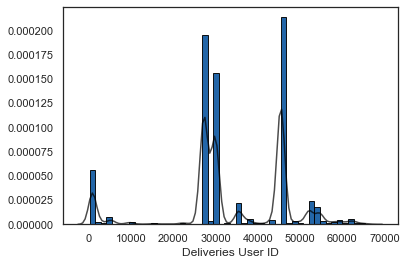

In [22]:
def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax

hist(data3['Deliveries User ID'])
plt.show()

In [23]:
numeric_features = data3.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Deliveries ID', 'Deliveries User ID', 'Deliveries Courier ID',
       'Deliveries Run ID', 'Deliveries Delivery Price', 'Deliveries Amount',
       'Deliveries Refund Amount', 'Deliveries Distance In Meters',
       'Delivery Details Pickup Postal Code', 'Deliveries Total Weight',
       'Delivery Surcharges Cbd Courier', 'Delivery Surcharges Cbd User',
       'Delivery Surcharges Insurance User',
       'Delivery Surcharges Item Quantity Surcharge',
       'Delivery Surcharges Multiple Items Courier',
       'Delivery Surcharges Multiple Items User', 'Deliveries Insurance Level',
       'Deliveries Item Number'],
      dtype='object')

In [24]:
categorical_features = data3.select_dtypes(include=[np.object])

categorical_features.columns

<ipython-input-24-6945318eb5f2>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data3.select_dtypes(include=[np.object])


Index(['Deliveries Type', 'Deliveries State Name',
       'Deliveries Delivery Option Name', 'Deliveries Created Time',
       'Deliveries Deliver for Time', 'Deliveries Ready At Time',
       'Deliveries Picked Up Time', 'Deliveries Delivered At Time',
       'Delivery Details Pickup Location', 'Delivery Details Pickup City Name',
       'Delivery Details Pickup Metro Area',
       'Delivery Details Pickup State Code',
       'Delivery Details Drop Off Location',
       'Delivery Details Drop Off City Name',
       'Delivery Details Drop Off Metro Area',
       'Delivery Details Drop Off Postal Code',
       'Delivery Details Drop Off State Code', 'Vehicles Name',
       'Deliveries Alcohol (Yes / No)', 'Deliveries Check ID (Yes / No)',
       'Deliveries Fragile (Yes / No)', 'Deliveries Important (Yes / No)',
       'Deliveries Leave Unattended (Yes / No)',
       'Deliveries Police Check (Yes / No)', 'Deliveries Open At Time'],
      dtype='object')

In [26]:
Counter(list(data3["Deliveries Alcohol (Yes / No)"]))

Counter({'No': 418613, 'Yes': 465431})

In [27]:
Counter(list(data3["Deliveries Fragile (Yes / No)"]))

Counter({'Yes': 66934, 'No': 817110})

In [28]:
#create the dataframe of the Deliver at vs Deliver for time
col_names = ['Deliveries ID','Deliveries Deliver for Time','Deliveries Ready At Time']
data3_time=data3.loc[: , col_names]
data3_time.head(10)

,Deliveries ID,Deliveries Deliver for Time,Deliveries Ready At Time
0,2329758,2021-06-24 03:00:00,2021-06-23 23:00:00
1,2613555,2021-05-08 03:30:00,2021-05-07 23:30:00
2,2736202,2021-01-08 02:00:00,2021-01-08 00:00:00
3,2790701,2021-02-05 06:00:00,2021-02-05 00:00:00
4,2790718,2021-03-04 05:30:00,2021-03-04 00:00:00
5,2836096,2021-01-12 02:00:00,2021-01-12 00:00:00
6,2853503,2021-01-17 06:00:00,2021-01-17 00:00:00
7,2853776,2021-01-05 03:30:00,2021-01-05 01:30:00
8,2859684,2021-01-09 06:00:00,2021-01-09 00:30:00
9,2873116,2021-01-04 08:00:00,2021-01-04 06:00:00


In [29]:
train = data3.sample(frac=0.7, random_state=1)
test = data3[data3.index.isin(train.index)==False]

In [30]:
train.describe().round(3)

,Deliveries ID,Deliveries User ID,Deliveries Courier ID,Deliveries Run ID,Deliveries Delivery Price,Deliveries Amount,Deliveries Refund Amount,Deliveries Distance In Meters,Delivery Details Pickup Postal Code,Deliveries Total Weight,Delivery Surcharges Cbd Courier,Delivery Surcharges Cbd User,Delivery Surcharges Insurance User,Delivery Surcharges Item Quantity Surcharge,Delivery Surcharges Multiple Items Courier,Delivery Surcharges Multiple Items User,Deliveries Insurance Level,Deliveries Item Number
count,618831.000,618831.000,604092.000,151036.000,618831.000,618831.000,618831.000,618831.000,617877.000,172638.000,618831.000,618831.000,618831.000,618831.000,618831.000,618831.000,618831.000,618831.000
mean,3368966.912,33548.195,61108.920,359410.438,14.659,19.421,0.570,6112.508,3463.310,21.576,0.065,0.086,0.039,0.263,0.243,0.309,0.021,1.333
std,255083.173,13907.883,20611.832,26752.415,6.069,7.701,3.644,8578.919,1261.653,13.042,0.372,0.490,0.324,1.872,1.040,1.361,0.187,1.138
min,2329758.000,187.000,1.000,309048.000,0.000,0.000,0.000,1.000,800.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,3148199.000,27237.000,47923.000,335269.000,12.210,15.500,0.000,2047.000,2304.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,3368909.000,29917.000,62919.000,359058.000,13.500,17.000,0.000,3516.000,3130.000,19.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,3589813.500,45440.000,77209.000,382262.000,16.130,20.500,0.000,6166.000,4127.000,28.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,3813987.000,66686.000,97411.000,406161.000,218.800,291.730,275.000,282105.000,7320.000,150.000,4.250,5.000,2.750,352.000,198.930,265.230,3.000,180.000


In [31]:
train.shape

(618831, 43)

In [32]:
train.tail()

,Deliveries ID,Deliveries User ID,Deliveries Courier ID,Deliveries Run ID,Deliveries Type,Deliveries State Name,Deliveries Delivery Option Name,Deliveries Delivery Price,Deliveries Amount,Deliveries Refund Amount,...,Delivery Surcharges Multiple Items User,Deliveries Alcohol (Yes / No),Deliveries Check ID (Yes / No),Deliveries Fragile (Yes / No),Deliveries Important (Yes / No),Deliveries Insurance Level,Deliveries Item Number,Deliveries Leave Unattended (Yes / No),Deliveries Police Check (Yes / No),Deliveries Open At Time
224477,3151436,45440,73087.0,NaN,SimpleDelivery,closed,1 hour,16.15,19.00,0.0,...,0.00,No,No,No,No,0,1,No,No,2021-02-16 02:29:06
711172,3638138,29917,45562.0,NaN,SimpleDelivery,closed,4 hour,12.01,16.01,0.0,...,1.51,Yes,No,No,No,0,3,No,No,2021-05-28 01:15:00
874848,3802057,27237,96802.0,NaN,SimpleDelivery,closed,1 hour,12.38,16.50,0.0,...,0.00,Yes,No,No,No,0,2,No,No,2021-06-29 02:50:00
334069,3261028,27237,77845.0,NaN,SimpleDelivery,closed,1 hour,12.75,17.00,0.0,...,0.00,Yes,No,No,No,0,2,No,No,2021-03-10 04:35:31
804101,3731073,49233,36601.0,NaN,SimpleDelivery,closed,1 hour,51.00,68.00,0.0,...,0.00,No,No,No,No,0,1,Yes,No,2021-06-15 03:33:53


In [33]:
train.skew(), train.kurt()

<ipython-input-33-f0a632ea16d2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew(), train.kurt()


(Deliveries ID                                  -0.000108
 Deliveries User ID                             -0.623754
 Deliveries Courier ID                          -0.568105
 Deliveries Run ID                               0.038601
 Deliveries Delivery Price                       3.150288
 Deliveries Amount                               4.366716
 Deliveries Refund Amount                       11.131805
 Deliveries Distance In Meters                   4.110248
 Delivery Details Pickup Postal Code             0.988353
 Deliveries Total Weight                         1.278852
 Delivery Surcharges Cbd Courier                 6.673839
 Delivery Surcharges Cbd User                    6.696921
 Delivery Surcharges Insurance User              8.242622
 Delivery Surcharges Item Quantity Surcharge    42.464774
 Delivery Surcharges Multiple Items Courier     34.982277
 Delivery Surcharges Multiple Items User        36.879334
 Deliveries Insurance Level                      9.461562
 Deliveries It

In [34]:
stats.describe(train['Deliveries Delivery Price']),train['Deliveries Delivery Price'].median()

(DescribeResult(nobs=618831, minmax=(0.0, 218.8), mean=14.658954124793352, variance=36.83131106715682, skewness=3.150280115011372, kurtosis=28.986591192141827),
 13.5)

In [35]:
correlation = numeric_features.corr()
print(correlation['Deliveries Delivery Price'].sort_values(ascending = False),'\n')

Deliveries Delivery Price                      1.000000
Deliveries Amount                              0.855000
Deliveries Distance In Meters                  0.356884
Delivery Surcharges Multiple Items User        0.181520
Delivery Surcharges Multiple Items Courier     0.180354
Delivery Surcharges Item Quantity Surcharge    0.155765
Deliveries Item Number                         0.146060
Deliveries Total Weight                        0.128831
Delivery Surcharges Insurance User             0.085696
Deliveries Insurance Level                     0.081166
Delivery Surcharges Cbd Courier                0.075339
Delivery Surcharges Cbd User                   0.075167
Deliveries User ID                             0.012682
Deliveries ID                                 -0.038574
Deliveries Run ID                             -0.069462
Delivery Details Pickup Postal Code           -0.075051
Deliveries Courier ID                         -0.085360
Deliveries Refund Amount                      -0

In [36]:
col_names = ['Deliveries Delivery Price', 'Deliveries Amount',
       'Deliveries Refund Amount', 'Deliveries Distance In Meters','Deliveries Total Weight',
       'Deliveries Insurance Level','Deliveries Item Number']
data31=train.loc[: , col_names]

In [37]:
data31.corr().round(3)

,Deliveries Delivery Price,Deliveries Amount,Deliveries Refund Amount,Deliveries Distance In Meters,Deliveries Total Weight,Deliveries Insurance Level,Deliveries Item Number
Deliveries Delivery Price,1.000,0.855,-0.328,0.355,0.128,0.081,0.148
Deliveries Amount,0.855,1.000,0.131,0.432,0.190,0.159,0.175
Deliveries Refund Amount,-0.328,0.131,1.000,0.064,0.042,-0.016,0.018
Deliveries Distance In Meters,0.355,0.432,0.064,1.000,0.036,0.034,-0.042
Deliveries Total Weight,0.128,0.190,0.042,0.036,1.000,NaN,-0.000
Deliveries Insurance Level,0.081,0.159,-0.016,0.034,NaN,1.000,-0.032
Deliveries Item Number,0.148,0.175,0.018,-0.042,-0.000,-0.032,1.000


The pairwise correlations reveal that the predictors that are most correlated with the Delivery Price are Deliveries Amount. Deliveries Refund Amount and Deliveries Distance In Meters have lower correlations with Delivery Price (arond 0.3)，, but still can be seen as correlated.

Delivery Price and Deliveries Refund Amount have negative correlation , with the highr of Delivery Price, the lower of Refund Amount. 

Also Deliveries Distance In Meters and Deliveries Amount are correlated with each other though is not quite high.

<AxesSubplot:title={'center':'Correlation of Numeric Features with Deliveries Delivery Price'}>

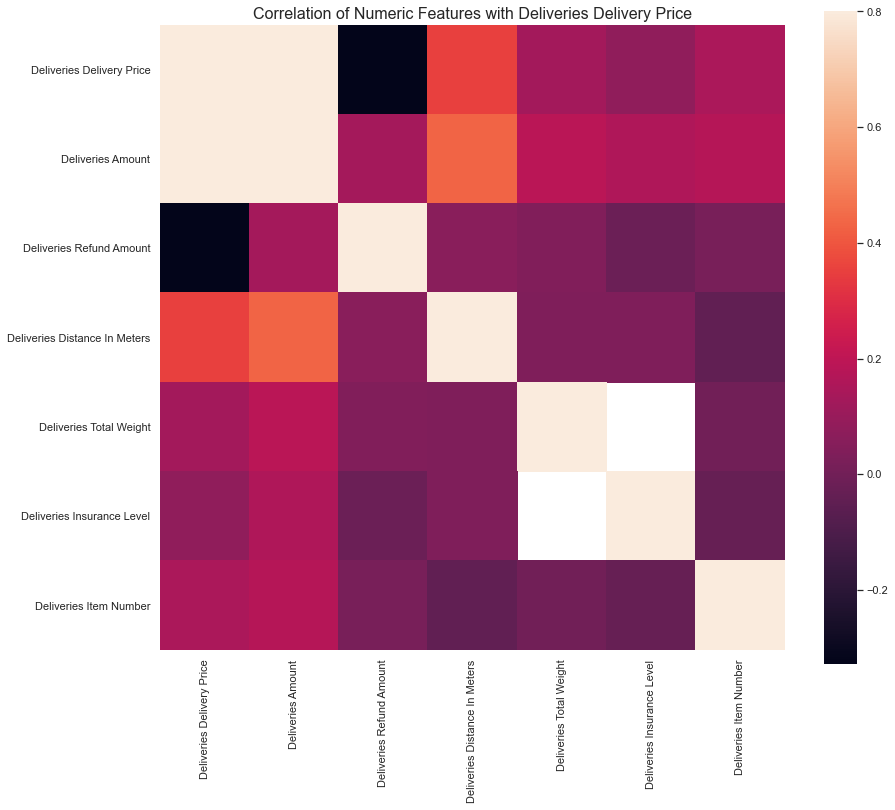

In [38]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Deliveries Delivery Price',y=1,size=16)

sns.heatmap(data31.corr(),square = True,  vmax=0.8)

In [39]:
sns.set_context('notebook') 
blue = sns.color_palette('Blues')[-1]

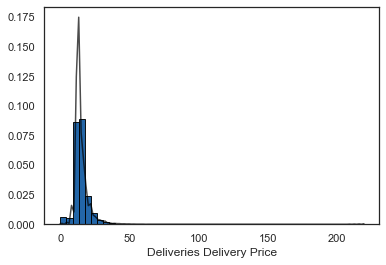

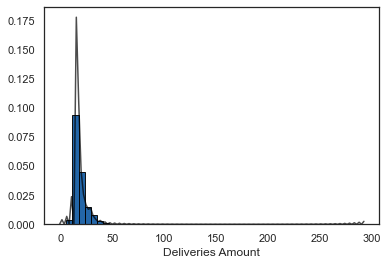

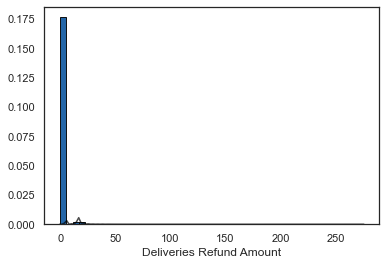

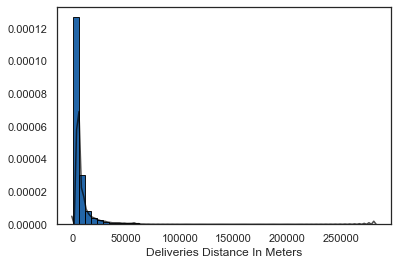

In [40]:
hist(train['Deliveries Delivery Price'])
plt.show()

hist(train['Deliveries Amount'])
plt.show()

hist(train['Deliveries Refund Amount'])
plt.show()

hist(train['Deliveries Distance In Meters'])
plt.show()

We find that all of the	Deliveries Delivery Price,Deliveries Amount and Deliveries Distance In Meters has a positive skewed distribution.

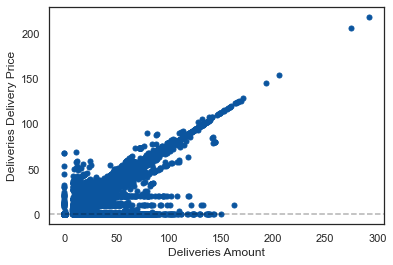

In [41]:
fig, ax= plt.subplots()
plt.scatter(train['Deliveries Amount'], train['Deliveries Delivery Price'], color=blue, s=25) # the s option is the size of the doty
ax.set_xlabel('Deliveries Amount')
ax.set_ylabel('Deliveries Delivery Price')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

The plot shows that there seems are a nonlinear relationnship between Price and Amonut, the linearity becomes more clearly when price > 150 

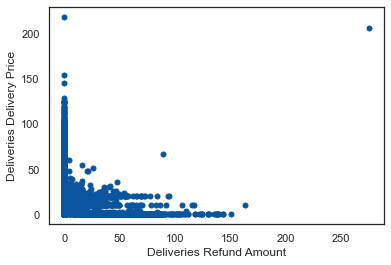

In [42]:
fig, ax= plt.subplots()
plt.scatter(train['Deliveries Refund Amount'], train['Deliveries Delivery Price'], color=blue, s=25) # the s option is the size of the dot
ax.set_xlabel('Deliveries Refund Amount')
ax.set_ylabel('Deliveries Delivery Price')
plt.show()

A scatter plot of credit limit with credit balance reveals that there is a nonlinear relatioship between these two variables.

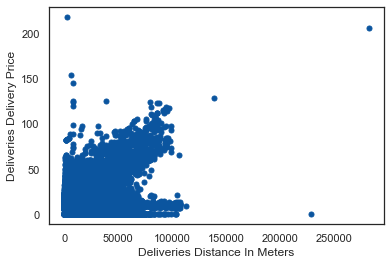

In [43]:
fig, ax= plt.subplots()
plt.scatter(train['Deliveries Distance In Meters'], train['Deliveries Delivery Price'], color=blue, s=25) # the s option is the size of the dot
ax.set_xlabel('Deliveries Distance In Meters')
ax.set_ylabel('Deliveries Delivery Price')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


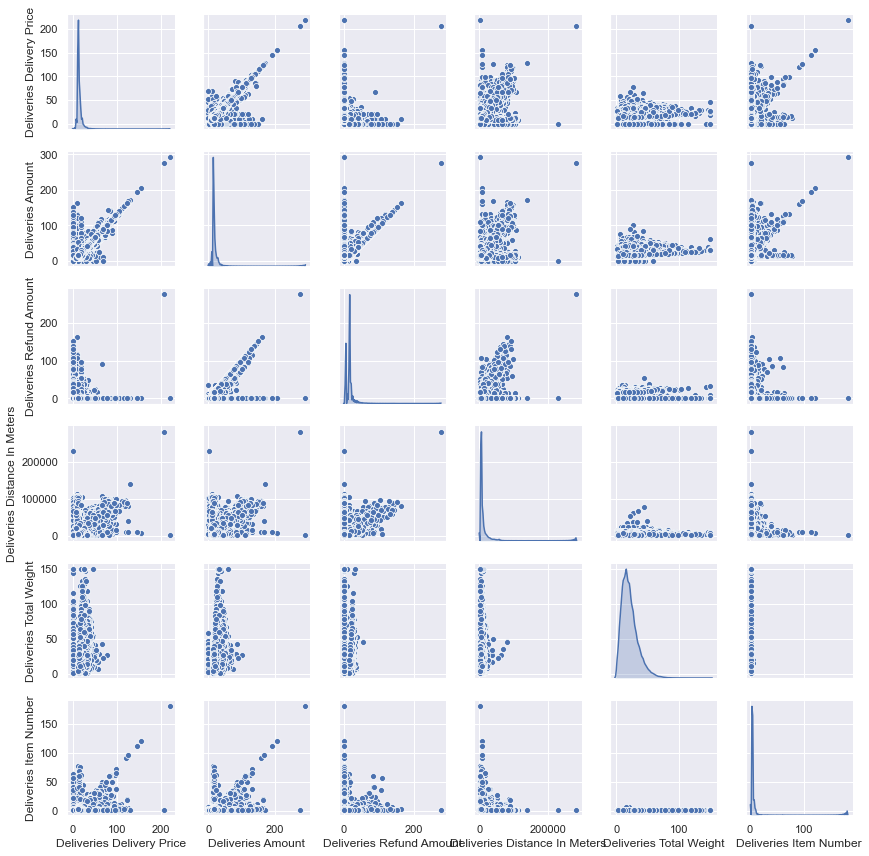

In [44]:
sns.set()
columns = ['Deliveries Delivery Price', 'Deliveries Amount',
       'Deliveries Refund Amount', 'Deliveries Distance In Meters','Deliveries Total Weight',
       'Deliveries Item Number']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

<ipython-input-45-2fc1e8fed4de>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(train.skew(),color='blue',axlabel ='Skewness')


<AxesSubplot:xlabel='Skewness'>

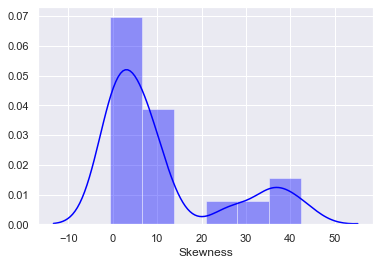

In [45]:
sns.distplot(train.skew(),color='blue',axlabel ='Skewness')

<ipython-input-46-874080f83d26>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(train.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


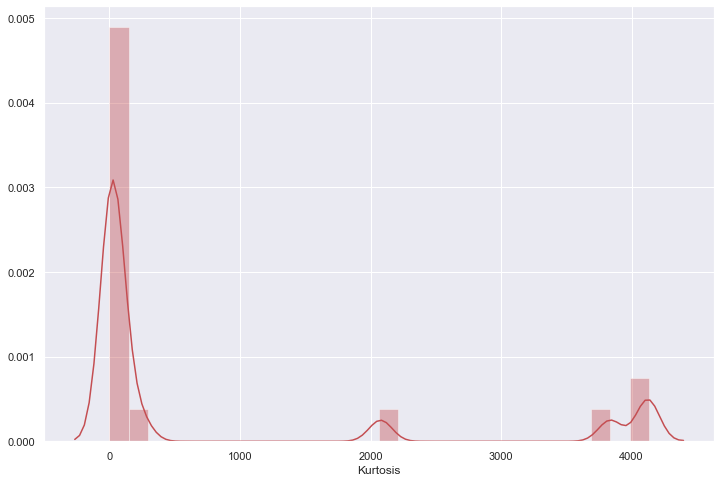

In [46]:
plt.figure(figsize = (12,8))
sns.distplot(train.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

In [47]:
stats.describe(train['Deliveries Item Number']),train['Deliveries Item Number'].median()

(DescribeResult(nobs=618831, minmax=(1, 180), mean=1.333425442487529, variance=1.294030662297849, skewness=26.743785961135046, kurtosis=2076.853976846396),
 1.0)

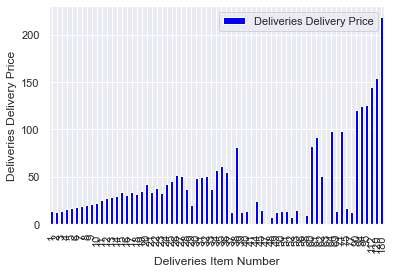

In [48]:
saleprice_overall_quality= train.pivot_table(index ='Deliveries Item Number',values = 'Deliveries Delivery Price', aggfunc = np.median)
saleprice_overall_quality.plot(kind = 'bar',color = 'blue')
plt.xlabel('Deliveries Item Number')
plt.ylabel('Deliveries Delivery Price')
plt.show()

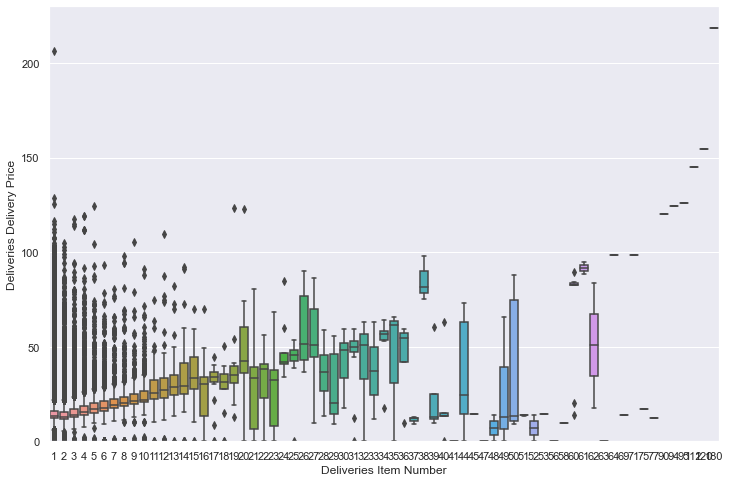

In [49]:
var = 'Deliveries Item Number'
data = pd.concat([train['Deliveries Delivery Price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x="Deliveries Item Number", y="Deliveries Delivery Price", data=data)
fig.axis(ymin=0, ymax=230);

# Missing Value Analysis

In [50]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
Deliveries Run ID,668522,0.756209
Deliveries Total Weight,637510,0.721129
Deliveries Courier ID,21130,0.023902
Delivery Details Pickup Postal Code,1324,0.001498
Delivery Surcharges Cbd User,0,0.000000
Deliveries Insurance Level,0,0.000000
Delivery Surcharges Multiple Items User,0,0.000000
Delivery Surcharges Multiple Items Courier,0,0.000000
Delivery Surcharges Item Quantity Surcharge,0,0.000000


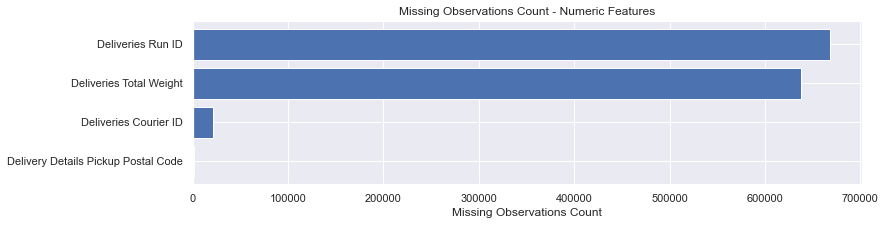

In [51]:
missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [52]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
Deliveries Delivered At Time,45588,0.051568
Vehicles Name,41348,0.046771
Deliveries Picked Up Time,31732,0.035894
Delivery Details Drop Off Metro Area,487,0.000551
Delivery Details Drop Off City Name,94,0.000106
Delivery Details Pickup Metro Area,89,0.000101
Delivery Details Drop Off Postal Code,83,0.000094
Delivery Details Pickup City Name,5,0.000006
Delivery Details Drop Off State Code,1,0.000001


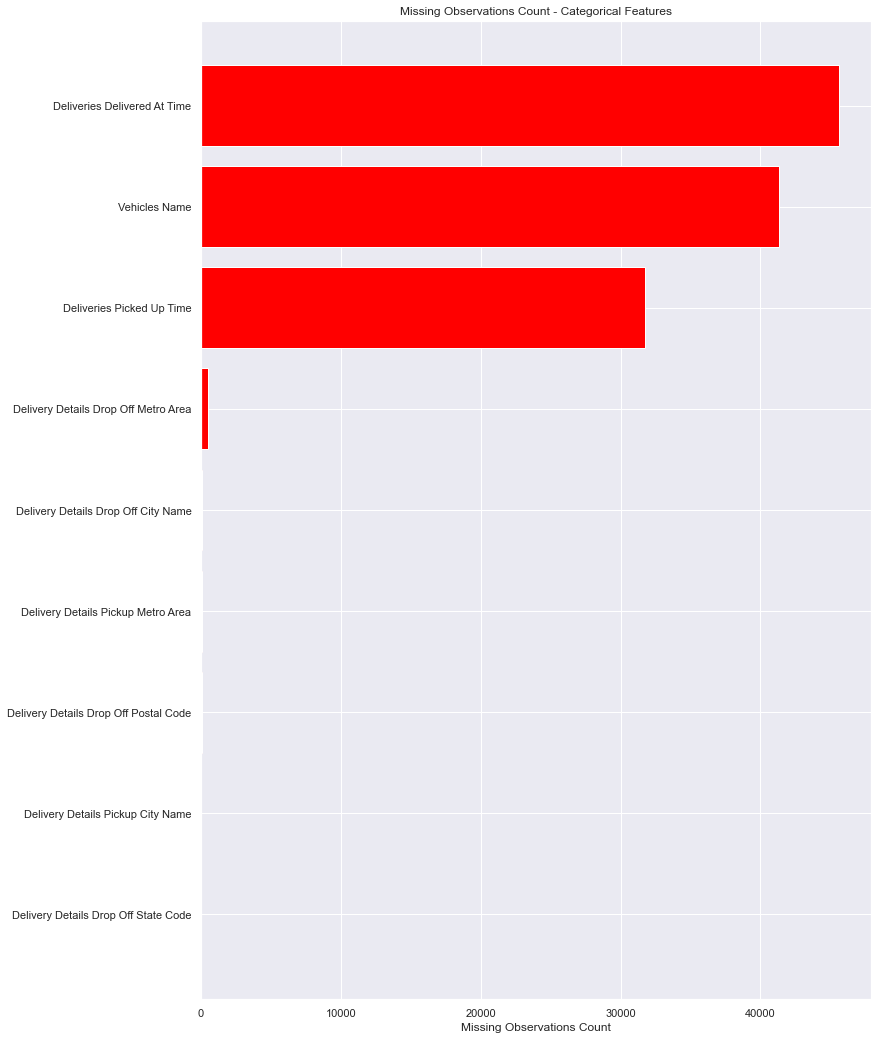

In [53]:
missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

In [54]:

for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))
 
for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Feature 'Deliveries Type' has '3' unique categories
Feature 'Deliveries State Name' has '5' unique categories
Feature 'Deliveries Delivery Option Name' has '6' unique categories
Feature 'Deliveries Created Time' has '531588' unique categories
Feature 'Deliveries Deliver for Time' has '240770' unique categories
Feature 'Deliveries Ready At Time' has '241260' unique categories
Feature 'Deliveries Picked Up Time' has '547984' unique categories
Feature 'Deliveries Delivered At Time' has '450532' unique categories
Feature 'Delivery Details Pickup Location' has '18323' unique categories
Feature 'Delivery Details Pickup City Name' has '2173' unique categories
Feature 'Delivery Details Pickup Metro Area' has '17' unique categories
Feature 'Delivery Details Pickup State Code' has '8' unique categories
Feature 'Delivery Details Drop Off Location' has '256672' unique categories
Feature 'Delivery Details Drop Off City Name' has '3002' unique categories
Feature 'Delivery Details Drop Off Metro Area

<ipython-input-54-506bef56b34d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])


Features in test set 'Deliveries Created Time' has '246725' unique categories
Features in test set 'Deliveries Deliver for Time' has '115214' unique categories
Features in test set 'Deliveries Ready At Time' has '115731' unique categories
Features in test set 'Deliveries Picked Up Time' has '245223' unique categories
Features in test set 'Deliveries Delivered At Time' has '222317' unique categories
Features in test set 'Delivery Details Pickup Location' has '10480' unique categories
Features in test set 'Delivery Details Pickup City Name' has '1845' unique categories
Features in test set 'Delivery Details Pickup Metro Area' has '17' unique categories
Features in test set 'Delivery Details Pickup State Code' has '8' unique categories
Features in test set 'Delivery Details Drop Off Location' has '144883' unique categories
Features in test set 'Delivery Details Drop Off City Name' has '2815' unique categories
Features in test set 'Delivery Details Drop Off Metro Area' has '17' unique cate

# 

In [55]:
data4=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Sherpa\\sherpa_proj_users.csv')
data4.head(10)

,Unnamed: 0,ID,Type,Category Name,Time Zone
0,1,187,User,Unknown,NaN
1,2,289,User,Flowers,NaN
2,3,290,Business,Flowers,Sydney
3,4,317,User,Unknown,NaN
4,5,318,User,Unknown,NaN
5,6,342,Business,Flowers,NaN
6,7,360,Business,Unknown,NaN
7,8,364,Business,Flowers,NaN
8,9,376,Business,Flowers,NaN
9,10,377,Business,Unknown,NaN


In [56]:
data4.describe().round(3)

,Unnamed: 0,ID
count,3554.000,3554.000
mean,1777.500,49553.783
std,1026.096,18012.319
min,1.000,187.000
25%,889.250,39111.750
50%,1777.500,58377.500
75%,2665.750,63399.500
max,3554.000,66686.000


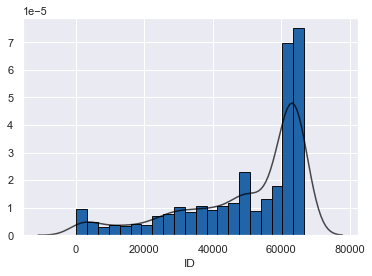

In [57]:
hist(data4['ID'])
plt.show()

In [58]:
Counter(list(data4["Type"]))

Counter({'User': 1070, 'Business': 2456, 'Enterprise': 28})

In [59]:
Counter(list(data4["Category Name"]))

Counter({'Unknown': 2806,
         'Flowers': 165,
         'Alcohol': 41,
         'Cakes & Doughnuts': 19,
         'Gifts': 25,
         'Courier': 6,
         'Fashion': 43,
         'Other': 55,
         'Catering': 6,
         'Legal': 22,
         'Technology': 39,
         'Wholesale Food': 21,
         'Public Relation': 28,
         'Sweets': 3,
         'Adult Products': 15,
         'Printing': 3,
         'Building/Construction': 14,
         'Sporting': 3,
         'Grocery/Food': 22,
         'Homewares': 8,
         'Realestate/Property': 3,
         'Retail': 11,
         'Chemist': 196})

In [60]:
Counter(list(data4["Time Zone"]))

Counter({nan: 2923,
         'Sydney': 257,
         'Melbourne': 172,
         'Brisbane': 54,
         'Australia/Sydney': 39,
         'Perth': 17,
         'Adelaide': 8,
         'Australia/Melbourne': 53,
         'Hobart': 2,
         'Australia/Brisbane': 15,
         'Australia/Perth': 6,
         'Australia/Canberra': 1,
         'Australia/Adelaide': 2,
         'Australia/Hobart': 1,
         'Canberra': 4})

In [61]:
data5=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Sherpa\\sherpa_proj_deliveries_arrived_for_pickup.csv')

data5.head(10)

,Deliveries ID,Deliveries Arrived for Pickup Time
0,3468897,2021-04-23 19:10:34
1,3475080,2021-04-24 18:51:10
2,3475287,2021-04-24 18:44:16
3,3447284,2021-04-19 10:24:50
4,3448443,2021-04-19 14:33:52
5,3448782,2021-04-19 14:33:55
6,3449054,2021-04-19 14:19:21
7,3450123,2021-04-20 10:53:13
8,3125232,NaN
9,3450763,2021-04-20 11:33:42
